In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the data

data = pd.read_csv("Walmart.csv")

In [4]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
data.shape

(6435, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
#converting the date column to datetime format

data["Date"] = pd.to_datetime(data['Date'])

In [8]:
#converting the holiday_flag column into category

data["Holiday_Flag"]=data["Holiday_Flag"].astype("category")

In [9]:
data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag          category
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [10]:
#taking the date column as the index

data.index = data['Date']
del data["Date"]
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [11]:
data.tail()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684
2012-05-10,45,733455.07,0,64.89,3.985,192.170412,8.667
2012-12-10,45,734464.36,0,54.47,4.000,192.327265,8.667
2012-10-19,45,718125.53,0,56.47,3.969,192.330854,8.667
2012-10-26,45,760281.43,0,58.85,3.882,192.308899,8.667


In [12]:
data.index

DatetimeIndex(['2010-05-02', '2010-12-02', '2010-02-19', '2010-02-26',
               '2010-05-03', '2010-12-03', '2010-03-19', '2010-03-26',
               '2010-02-04', '2010-09-04',
               ...
               '2012-08-24', '2012-08-31', '2012-07-09', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-05-10', '2012-12-10',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=6435, freq=None)

In [13]:
#there is data from 2010-05-02 to 2012-10-26--->29 months

In [14]:
data.describe()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,100.140000,4.468000,227.232807,14.313000


## 1. Using the above data, come up with useful insights that can be used by each of the stores to improve in various areas.


In [15]:
#checking for null values

data.isnull().sum()

#no null values

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [16]:
#Unique store numbers

data["Store"].unique()

#Store numbers range from 1 to 45

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [17]:
 #finding the stores with the highest and lowest sales
    
data.groupby("Store").Weekly_Sales.sum().sort_values(ascending=False)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

In [18]:
#Maximum total sales at 20 and minimum total sales at 33

In [19]:
#have holidays affected the sales? assuming 0 is no holiday and 1 is holiday

holiday=pd.DataFrame(data.groupby("Holiday_Flag").Weekly_Sales.sum().sort_values(ascending=False))
holiday.head()

,Weekly_Sales
Holiday_Flag,
0,6.231919e+09
1,5.052996e+08


In [19]:
#Total sales during holidays are lower than those during non-holidays

([<matplotlib.patches.Wedge at 0x252aa3be6a0>,
 [Text(-1.0696059603508306, 0.2567938659352628, 'Not a holiday'),
  Text(1.0696059783829106, -0.25679379082745957, 'Holiday')])

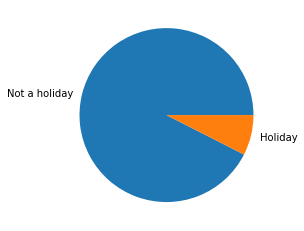

In [20]:
labels=["Not a holiday","Holiday"]
plt.pie(holiday.Weekly_Sales,labels=labels)

<AxesSubplot:>

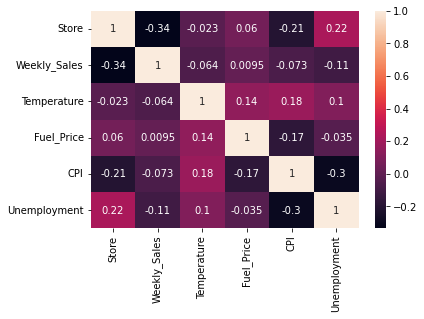

In [21]:
#Do features like temperature, fuel price, cpi and unemployment affect the sales?

sns.heatmap(data.corr(),annot=True)

In [22]:
#Fuel_Price has negligible correlation to sales
#Unemployment rate has a negative correlation with the weekly sales
#Temperature and CPI have low negative correlation to the sales

In [22]:
#function to get a dataframe for specific stores

def store_df(x):    #x is the store number
    store=pd.DataFrame(data[data["Store"]==x])
    return store

In [23]:
store_df(13)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,13,1967220.53,0,31.53,2.666,126.442065,8.316
2010-12-02,13,2030933.46,1,33.16,2.671,126.496258,8.316
2010-02-19,13,1970274.64,0,35.70,2.654,126.526286,8.316
2010-02-26,13,1817850.32,0,29.98,2.667,126.552286,8.316
2010-05-03,13,1939980.43,0,40.65,2.681,126.578286,8.316
...,...,...,...,...,...,...,...
2012-09-28,13,1927664.11,0,64.80,3.821,131.043000,5.765
2012-05-10,13,2041918.74,0,61.79,3.815,131.075667,5.621
2012-12-10,13,1999079.44,0,55.10,3.797,131.108333,5.621


In [24]:
#There are 143 entries for each store (143*45=6435)

In [25]:
#analysing the stores with highest and lowest total sales

#Highest total sales-Store 20

Store_20=store_df(20)
Store_20.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,20,2401395.47,0,25.92,2.784,204.247194,8.187
2010-12-02,20,2109107.90,1,22.12,2.773,204.385747,8.187
2010-02-19,20,2161549.76,0,25.43,2.745,204.432100,8.187
2010-02-26,20,1898193.95,0,32.32,2.754,204.463087,8.187
2010-05-03,20,2119213.72,0,31.75,2.777,204.494073,8.187


In [26]:
Store_20.describe()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,143.0,1.430000e+02,143.000000,143.000000,143.000000,143.000000
mean,20.0,2.107677e+06,55.451399,3.417608,209.038131,7.371413
std,0.0,2.759006e+05,16.543846,0.443029,4.176736,0.305069
min,20.0,1.761017e+06,20.390000,2.699000,203.610178,6.961000
25%,20.0,1.950866e+06,42.865000,2.921000,204.774194,7.139000
50%,20.0,2.053165e+06,58.650000,3.541000,208.556714,7.287000
75%,20.0,2.155186e+06,70.330000,3.809000,213.372861,7.484000
max,20.0,3.766687e+06,79.200000,4.066000,216.151590,8.187000


In [27]:
#Highest weekly sales in store 20

print(Store_20[Store_20["Weekly_Sales"]==Store_20["Weekly_Sales"].max()])

            Store  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                    
2010-12-24     20    3766687.43            0        25.17       3.141   

                   CPI  Unemployment  
Date                                  
2010-12-24  204.637673         7.484  


In [28]:
#The highest sale in Store 20 was on 24th December 2010-week before christmas
#Not a holiday
#Fuel price was less than the mean
#CPI was close to the overall minimum of 203 for the store
#Unemployment rate was in the 75th percentile

In [29]:
#Lowest weekly sales in store 20

print(Store_20[Store_20["Weekly_Sales"]==Store_20["Weekly_Sales"].min()])

            Store  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                    
2012-01-27     20    1761016.51            0        37.19       3.567   

                   CPI  Unemployment  
Date                                  
2012-01-27  212.928631         6.961  


In [30]:
#The lowest sale in Store 20 was on 27th January 2012
#Not a holiday
#Lowest unemployment rate
#CPI was close to the 75th percentile

<AxesSubplot:xlabel='Date'>

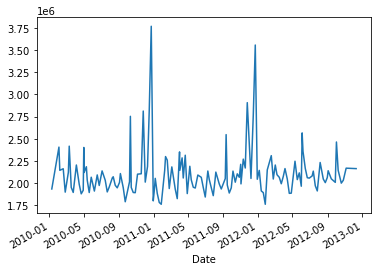

In [31]:
#plotting the weekly sales in store 20

Store_20["Weekly_Sales"].plot()

In [32]:
#There are peaks in sales towards the end of the years

In [33]:
#Lowest total sales- Store 33

Store_33=store_df(33)
Store_33

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,33,274593.43,0,58.40,2.962,126.442065,10.115
2010-12-02,33,294882.83,1,55.47,2.828,126.496258,10.115
2010-02-19,33,296850.83,0,62.16,2.915,126.526286,10.115
2010-02-26,33,284052.77,0,56.50,2.825,126.552286,10.115
2010-05-03,33,291484.89,0,59.17,2.877,126.578286,10.115
...,...,...,...,...,...,...,...
2012-09-28,33,242813.51,0,86.42,3.966,131.043000,7.147
2012-05-10,33,265444.90,0,85.18,4.132,131.075667,6.895
2012-12-10,33,291781.15,0,79.64,4.468,131.108333,6.895


In [34]:
Store_33.describe()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,143.0,143.000000,143.000000,143.000000,143.000000,143.000000
mean,33.0,259861.692028,76.728182,3.575923,128.679669,8.533154
std,0.0,24132.927322,15.377213,0.446957,1.858300,0.963780
min,33.0,209986.250000,46.250000,2.825000,126.064000,6.895000
25%,33.0,242491.545000,61.990000,3.107000,126.590094,7.603000
50%,33.0,258427.390000,77.440000,3.675000,129.075677,8.687000
75%,33.0,275235.705000,91.470000,3.905000,130.502414,9.265000
max,33.0,331173.510000,100.140000,4.468000,131.193097,10.115000


In [35]:
#Highest weekly sales in store 33

print(Store_33[Store_33["Weekly_Sales"]==Store_33["Weekly_Sales"].max()])

            Store  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                    
2010-05-14     33     331173.51            0         76.8       3.145   

                   CPI  Unemployment  
Date                                  
2010-05-14  126.208548         9.849  


In [36]:
#The highest sale in Store 33 was on 14th May 2010
#Not a holiday
#Fuel price was less than the mean
#CPI was close to the overall minimum of 126 for the store
#Unemployment rate was over the 75th percentile

In [37]:
#Lowest weekly sales in store 33

print(Store_33[Store_33["Weekly_Sales"]==Store_33["Weekly_Sales"].min()])

            Store  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                    
2010-03-12     33     209986.25            0        52.82       3.041   

                   CPI  Unemployment  
Date                                  
2010-03-12  126.731333         9.265  


In [38]:
##The lowest sale in Store 33 was on 12th March 2010
#Not a holiday
#Unemployment rate was in the 75th percentile
#CPI was low

<AxesSubplot:xlabel='Date'>

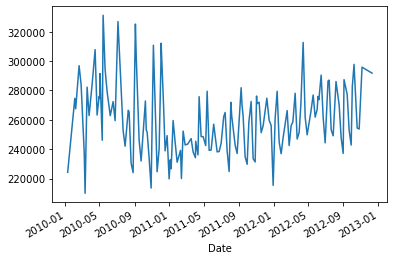

In [39]:
#plotting the weekly sales in store 33

Store_33["Weekly_Sales"].plot()

## 2. Forecast the sales for each store for the next 12 weeks.


In [49]:
#separating months and years for convenience

import calendar
data['Month'] = pd.DatetimeIndex(data.index).month
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])
data['Year'] = pd.DatetimeIndex(data.index).year
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
Date,,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,May,2010
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,Dec,2010
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,Feb,2010
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,Feb,2010
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106,May,2010
...,...,...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684,Sep,2012
2012-05-10,45,733455.07,0,64.89,3.985,192.170412,8.667,May,2012
2012-12-10,45,734464.36,0,54.47,4.000,192.327265,8.667,Dec,2012


In [50]:
#Store-1

Store_1=store_df(1)
Store_1

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
Date,,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,May,2010
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,Dec,2010
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,Feb,2010
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,Feb,2010
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106,May,2010
...,...,...,...,...,...,...,...,...,...
2012-09-28,1,1437059.26,0,76.08,3.666,222.981658,6.908,Sep,2012
2012-05-10,1,1670785.97,0,68.55,3.617,223.181477,6.573,May,2012
2012-12-10,1,1573072.81,0,62.99,3.601,223.381296,6.573,Dec,2012


<AxesSubplot:xlabel='Date'>

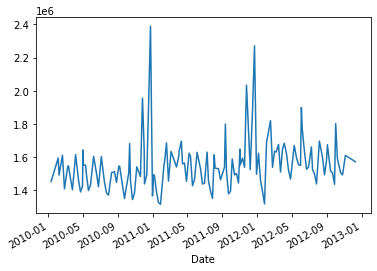

In [51]:
#plotting the weekly sales in store 1

Store_1["Weekly_Sales"].plot()

In [1]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [52]:
#Augmented Dickey-Fuller Test-to check stationarity

from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(Store_1['Weekly_Sales'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dftest[1]>0.05:
	print('This is a non-stationary series')
else:
	print("This is a stationary time series")

Results of Dickey-Fuller Test:
Test Statistic                  -5.102186
p-value                          0.000014
#lags Used                       4.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64
This is a stationary time series


In [53]:
#monthly sales data for Store-1

monthly_sales_data = pd.pivot_table(Store_1, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,2010,2011,2012
Month,,,
Jan,1.453330e+06,1.403784e+06,1.449450e+06
Feb,1.527271e+06,1.569489e+06,1.682560e+06
Mar,1.491286e+06,1.584333e+06,1.621124e+06
Apr,1.474485e+06,1.586654e+06,1.574014e+06
May,1.512690e+06,1.530856e+06,1.607377e+06
Jun,1.510496e+06,1.533445e+06,1.653129e+06
Jul,1.452486e+06,1.455998e+06,1.531465e+06
Aug,1.494675e+06,1.536141e+06,1.592826e+06
Sep,1.468416e+06,1.525799e+06,1.534011e+06


<AxesSubplot:xlabel='Month'>

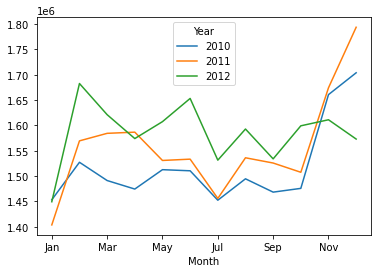

In [54]:
monthly_sales_data.plot()

In [ ]:
#the three years have different trends, especially in 2012, the sales has a decreasing trend towards the end of the year

In [55]:
#yearly sales data of Store-1

yearly_sales_data = pd.pivot_table(Store_1, values = "Weekly_Sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2010,1453329.500,1.527271e+06,1491285.755,1.474485e+06,1.512690e+06,1.510496e+06,1452486.460,1.494675e+06,1.468416e+06,1.475829e+06,1660656.460,1.703714e+06
2011,1403784.306,1.569489e+06,1584332.950,1.586654e+06,1.530856e+06,1.533445e+06,1455997.762,1.536141e+06,1.525799e+06,1.507572e+06,1674109.962,1.793494e+06
2012,1449449.545,1.682560e+06,1621124.184,1.574014e+06,1.607377e+06,1.653129e+06,1531464.960,1.592826e+06,1.534011e+06,1.599154e+06,1611096.050,1.573073e+06


<AxesSubplot:>

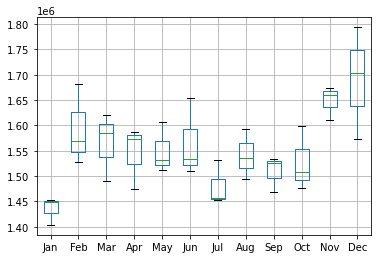

In [56]:
yearly_sales_data.boxplot()

In [66]:
#sorting the date index

Store_1.sort_index(inplace=True)
Store_1

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
Date,,,,,,,,,
2010-01-10,1,1453329.50,0,71.89,2.603,211.671989,7.838,Jan,2010
2010-02-04,1,1594968.28,0,62.27,2.719,210.820450,7.808,Feb,2010
2010-02-07,1,1492418.14,0,80.91,2.669,211.223533,7.787,Feb,2010
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,Feb,2010
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,Feb,2010
...,...,...,...,...,...,...,...,...,...
2012-10-08,1,1592409.97,0,85.05,3.494,221.958433,6.908,Oct,2012
2012-10-19,1,1508068.77,0,67.97,3.594,223.425723,6.573,Oct,2012
2012-10-26,1,1493659.74,0,69.16,3.506,223.444251,6.573,Oct,2012


In [70]:
#seasonal decomposition

decomposition = sm.tsa.seasonal_decompose(Store_1['Weekly_Sales'], model='multiplicative',period=1)

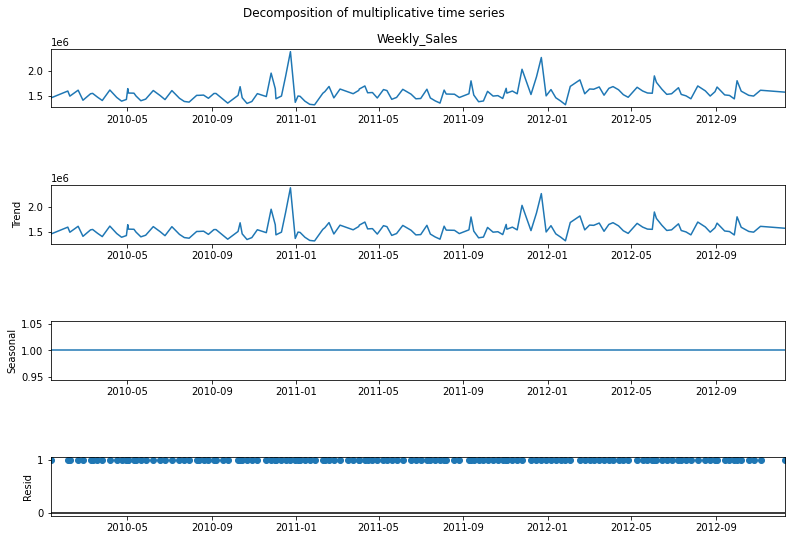

In [71]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

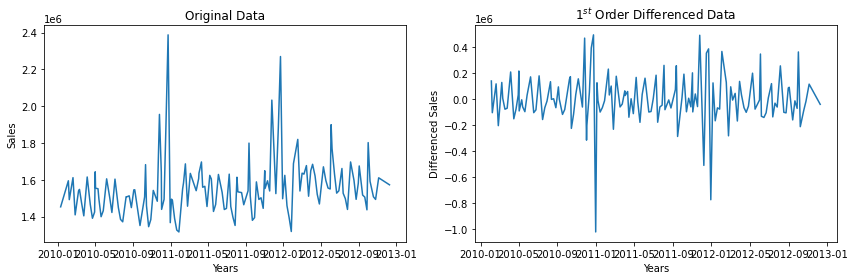

In [84]:
random_df=pd.DataFrame(Store_1['Weekly_Sales'])

fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)

axes[0].plot(random_df.index, random_df['Weekly_Sales'])
axes[0].set_xlabel("Years")
axes[0].set_ylabel("Sales")
axes[0].set_title("Original Data")

axes[1].plot(random_df.index, random_df['Weekly_Sales'].diff(periods=1))
axes[1].set_xlabel("Years")
axes[1].set_ylabel("Differenced Sales")
axes[1].set_title("1$^{st}$ Order Differenced Data")

plt.tight_layout()
plt.show()

In [85]:
St1_log = np.log10(random_df)
St1_log.dropna(inplace=True)

St1_log_diff = St1_log.diff(periods=1) # same as St1_log_diff = St1_log - St1_log.shift(periods=1)
St1_log_diff.dropna(inplace=True)

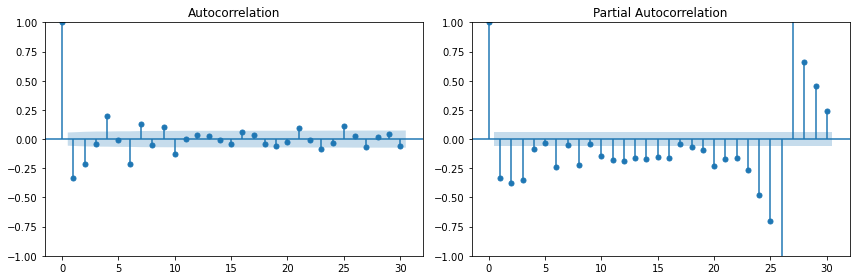

In [86]:
#autocorrelation

fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(St1_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(St1_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [87]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [88]:
#finding the best model

import sys

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(St1_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 model - AIC:-508.15093470893953


In [89]:
#fitting the model

best_model = sm.tsa.statespace.SARIMAX(St1_log,
                                      order=(1, 1, 1),
                                      seasonal_order=(0, 0, 0, 12),
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()

In [90]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 257.075
Date:                Thu, 23 Feb 2023   AIC                           -508.151
Time:                        23:08:00   BIC                           -499.283
Sample:                             0   HQIC                          -504.548
                                - 143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1894      0.066      2.867      0.004       0.060       0.319
ma.L1         -0.9670      0.031    -30.715      0.000      -1.029      -0.905
sigma2         0.0015      0.000     12.734      0.0

In [91]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-06-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [92]:
#forecasting for Store-1

Store1_forecasted = pred_dynamic.predicted_mean
Store1_truth = St1_log['2012-06-01':]

# Compute the mean square error
mse = ((Store1_forecasted - Store1_truth['Weekly_Sales']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

The Mean Squared Error of our forecasts is 0.0009


In [96]:
#forecasting for 12 weeks-assume 3 months

n_steps = 3
pred_uc_99 = best_results.get_forecast(steps=3, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=3, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [97]:
n_steps = 3
idx = pd.date_range(Store_1.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2013-01-01,1.576172e+06,1.320302e+06,1.881630e+06,1.320302e+06,1.881630e+06
2013-02-01,1.576760e+06,1.315089e+06,1.890497e+06,1.315089e+06,1.890497e+06
2013-03-01,1.576871e+06,1.314541e+06,1.891553e+06,1.314541e+06,1.891553e+06


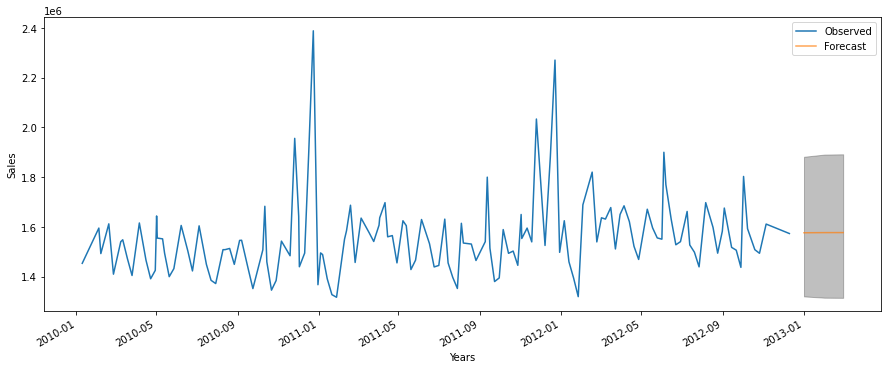

In [98]:
#plotting the forecast for Store-1

axis = Store_1['Weekly_Sales'].plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
#axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.75)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

In [99]:
#Forecasting for the store with the highest total sales- Store-20

Store_20=store_df(20)
Store_20

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
Date,,,,,,,,,
2010-05-02,20,2401395.47,0,25.92,2.784,204.247194,8.187,May,2010
2010-12-02,20,2109107.90,1,22.12,2.773,204.385747,8.187,Dec,2010
2010-02-19,20,2161549.76,0,25.43,2.745,204.432100,8.187,Feb,2010
2010-02-26,20,1898193.95,0,32.32,2.754,204.463087,8.187,Feb,2010
2010-05-03,20,2119213.72,0,31.75,2.777,204.494073,8.187,May,2010
...,...,...,...,...,...,...,...,...,...
2012-09-28,20,2008350.58,0,58.65,3.997,215.736716,7.280,Sep,2012
2012-05-10,20,2246411.89,0,60.77,3.985,215.925886,7.293,May,2012
2012-12-10,20,2162951.36,0,47.20,4.000,216.115057,7.293,Dec,2012


In [100]:
#sorting the date index

Store_20.sort_index(inplace=True)
Store_20

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
Date,,,,,,,,,
2010-01-10,20,1933719.21,0,61.08,2.707,204.885097,7.484,Jan,2010
2010-02-04,20,2405395.22,0,51.00,2.850,204.025284,7.856,Feb,2010
2010-02-07,20,2143676.77,0,70.10,2.815,204.465056,7.527,Feb,2010
2010-02-19,20,2161549.76,0,25.43,2.745,204.432100,8.187,Feb,2010
2010-02-26,20,1898193.95,0,32.32,2.754,204.463087,8.187,Feb,2010
...,...,...,...,...,...,...,...,...,...
2012-10-08,20,2144245.39,0,75.40,3.722,214.748459,7.280,Oct,2012
2012-10-19,20,1999363.49,0,56.26,3.969,216.146470,7.293,Oct,2012
2012-10-26,20,2031650.55,0,60.04,3.882,216.151590,7.293,Oct,2012


In [101]:
#Augmented Dickey-Fuller Test-to check stationarity

from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(Store_20['Weekly_Sales'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dftest[1]>0.05:
	print('This is a non-stationary series')
else:
	print("This is a stationary time series")

Results of Dickey-Fuller Test:
Test Statistic                -9.804396e+00
p-value                        5.878593e-17
#lags Used                     0.000000e+00
Number of Observations Used    1.420000e+02
Critical Value (1%)           -3.477262e+00
Critical Value (5%)           -2.882118e+00
Critical Value (10%)          -2.577743e+00
dtype: float64
This is a stationary time series


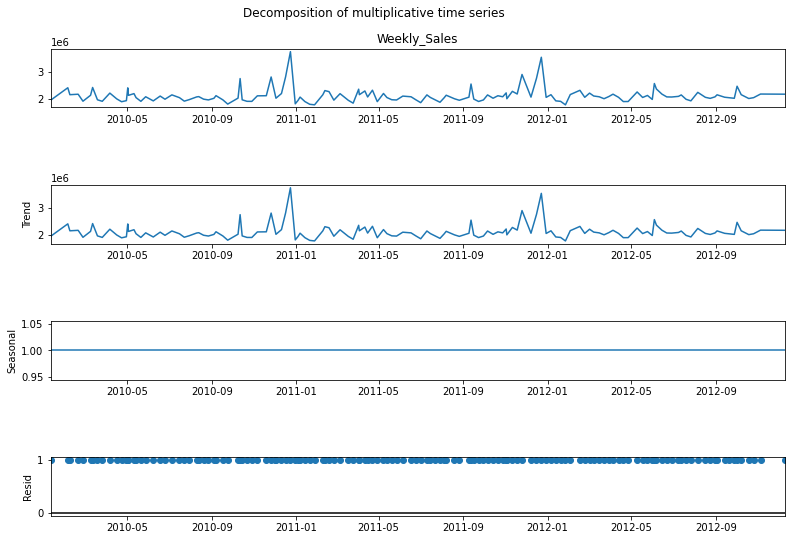

In [102]:
#seasonal decomposition

decomposition = sm.tsa.seasonal_decompose(Store_20['Weekly_Sales'], model='multiplicative',period=1)

fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

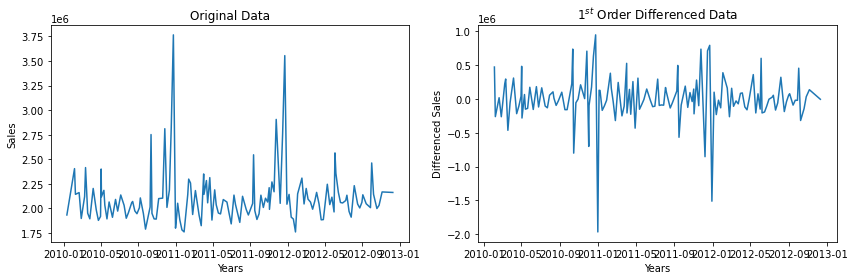

In [103]:
random_df=pd.DataFrame(Store_20['Weekly_Sales'])

fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)

axes[0].plot(random_df.index, random_df['Weekly_Sales'])
axes[0].set_xlabel("Years")
axes[0].set_ylabel("Sales")
axes[0].set_title("Original Data")

axes[1].plot(random_df.index, random_df['Weekly_Sales'].diff(periods=1))
axes[1].set_xlabel("Years")
axes[1].set_ylabel("Differenced Sales")
axes[1].set_title("1$^{st}$ Order Differenced Data")

plt.tight_layout()
plt.show()

In [104]:
St20_log = np.log10(random_df)
St20_log.dropna(inplace=True)

St20_log_diff = St20_log.diff(periods=1) 
St20_log_diff.dropna(inplace=True)

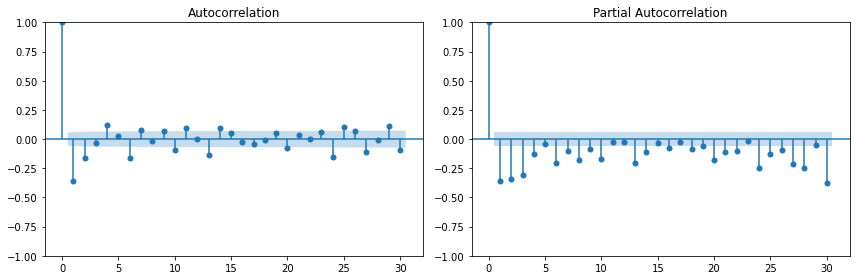

In [105]:
#autocorrelation

fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(St20_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(St20_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [106]:
#finding the best model


best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(St20_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 model - AIC:-446.3706233038282


In [107]:
#fitting the model

best_model = sm.tsa.statespace.SARIMAX(St20_log,
                                      order=(1, 1, 1),
                                      seasonal_order=(0, 0, 0, 12),
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()

In [108]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 226.185
Date:                Thu, 23 Feb 2023   AIC                           -446.371
Time:                        23:22:48   BIC                           -437.503
Sample:                             0   HQIC                          -442.767
                                - 143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1912      0.063      3.044      0.002       0.068       0.314
ma.L1         -0.9922      0.082    -12.143      0.000      -1.152      -0.832
sigma2         0.0024      0.000     11.632      0.0

In [109]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-06-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [110]:
#forecasting for Store-20

Store20_forecasted = pred_dynamic.predicted_mean
Store20_truth = St20_log['2012-06-01':]

# Compute the mean square error
mse = ((Store20_forecasted - Store20_truth['Weekly_Sales']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

The Mean Squared Error of our forecasts is 0.0009


In [111]:
#forecasting for 12 weeks-assume 3 months

n_steps = 3
pred_uc_99 = best_results.get_forecast(steps=3, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=3, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [112]:
n_steps = 3
idx = pd.date_range(Store_20.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2013-01-01,2.108086e+06,1.692789e+06,2.625269e+06,1.692789e+06,2.625269e+06
2013-02-01,2.097756e+06,1.677136e+06,2.623866e+06,1.677136e+06,2.623866e+06
2013-03-01,2.095787e+06,1.675154e+06,2.622041e+06,1.675154e+06,2.622041e+06


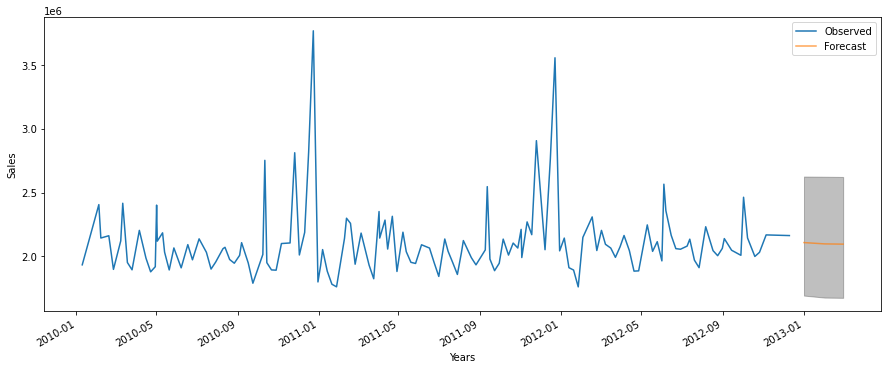

In [113]:
#plotting the forecast for Store-20

axis = Store_20['Weekly_Sales'].plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
#axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.75)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

In [114]:
#Forecasting for the store with the lowest total sales- Store-33

Store_33=store_df(33)
Store_33

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
Date,,,,,,,,,
2010-05-02,33,274593.43,0,58.40,2.962,126.442065,10.115,May,2010
2010-12-02,33,294882.83,1,55.47,2.828,126.496258,10.115,Dec,2010
2010-02-19,33,296850.83,0,62.16,2.915,126.526286,10.115,Feb,2010
2010-02-26,33,284052.77,0,56.50,2.825,126.552286,10.115,Feb,2010
2010-05-03,33,291484.89,0,59.17,2.877,126.578286,10.115,May,2010
...,...,...,...,...,...,...,...,...,...
2012-09-28,33,242813.51,0,86.42,3.966,131.043000,7.147,Sep,2012
2012-05-10,33,265444.90,0,85.18,4.132,131.075667,6.895,May,2012
2012-12-10,33,291781.15,0,79.64,4.468,131.108333,6.895,Dec,2012


In [115]:
#sorting the date index

Store_33.sort_index(inplace=True)
Store_33

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
Date,,,,,,,,,
2010-01-10,33,224294.39,0,91.45,3.001,126.234600,9.265,Jan,2010
2010-02-04,33,274634.52,0,66.79,3.086,126.603484,9.849,Feb,2010
2010-02-07,33,267495.76,0,97.66,2.978,126.139200,9.495,Feb,2010
2010-02-19,33,296850.83,0,62.16,2.915,126.526286,10.115,Feb,2010
2010-02-26,33,284052.77,0,56.50,2.825,126.552286,10.115,Feb,2010
...,...,...,...,...,...,...,...,...,...
2012-10-08,33,297753.49,0,100.07,3.811,130.756161,7.147,Oct,2012
2012-10-19,33,254412.34,0,75.55,4.449,131.149968,6.895,Oct,2012
2012-10-26,33,253731.13,0,73.70,4.301,131.193097,6.895,Oct,2012


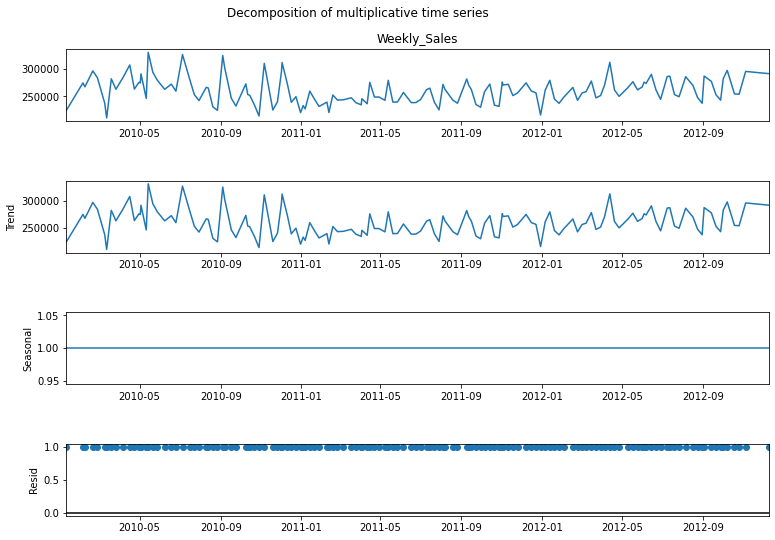

In [116]:
#seasonal decomposition

decomposition = sm.tsa.seasonal_decompose(Store_33['Weekly_Sales'], model='multiplicative',period=1)

fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

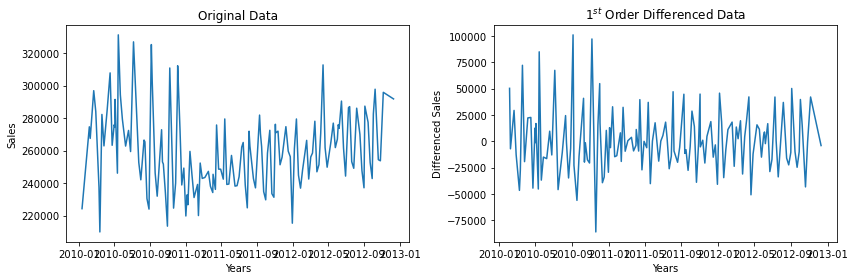

In [117]:
random_df=pd.DataFrame(Store_33['Weekly_Sales'])

fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)

axes[0].plot(random_df.index, random_df['Weekly_Sales'])
axes[0].set_xlabel("Years")
axes[0].set_ylabel("Sales")
axes[0].set_title("Original Data")

axes[1].plot(random_df.index, random_df['Weekly_Sales'].diff(periods=1))
axes[1].set_xlabel("Years")
axes[1].set_ylabel("Differenced Sales")
axes[1].set_title("1$^{st}$ Order Differenced Data")

plt.tight_layout()
plt.show()

In [118]:
St33_log = np.log10(random_df)
St33_log.dropna(inplace=True)

St33_log_diff = St33_log.diff(periods=1) 
St33_log_diff.dropna(inplace=True)

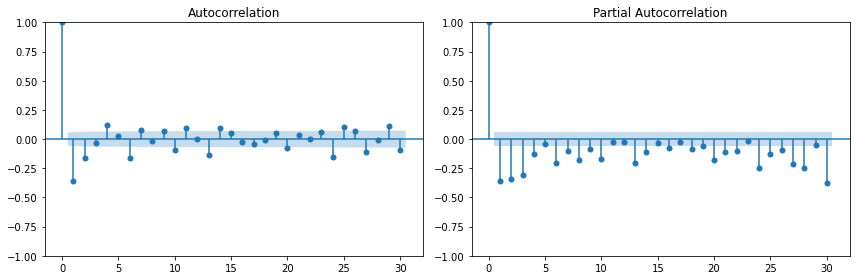

In [119]:
#autocorrelation

fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(St20_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(St20_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [120]:
#fitting the model-using the same best model

best_model = sm.tsa.statespace.SARIMAX(St33_log,
                                      order=(1, 1, 1),
                                      seasonal_order=(0, 0, 0, 12),
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()

In [121]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 260.490
Date:                Thu, 23 Feb 2023   AIC                           -514.979
Time:                        23:30:59   BIC                           -506.112
Sample:                             0   HQIC                          -511.376
                                - 143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0986      0.079      1.241      0.215      -0.057       0.254
ma.L1         -0.9180      0.041    -22.125      0.000      -0.999      -0.837
sigma2         0.0015      0.000      7.861      0.0

In [122]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-06-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [123]:
#forecasting for Store-33

Store33_forecasted = pred_dynamic.predicted_mean
Store33_truth = St33_log['2012-06-01':]

# Compute the mean square error
mse = ((Store33_forecasted - Store33_truth['Weekly_Sales']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

The Mean Squared Error of our forecasts is 0.0011


In [124]:
#forecasting for 12 weeks-assume 3 months

n_steps = 3
pred_uc_99 = best_results.get_forecast(steps=3, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=3, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [125]:
n_steps = 3
idx = pd.date_range(Store_33.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2013-01-01,271458.562234,228253.335687,322841.945720,228253.335687,322841.945720
2013-02-01,269533.422922,226000.112364,321452.344923,226000.112364,321452.344923
2013-03-01,269344.379186,225650.313036,321499.197688,225650.313036,321499.197688


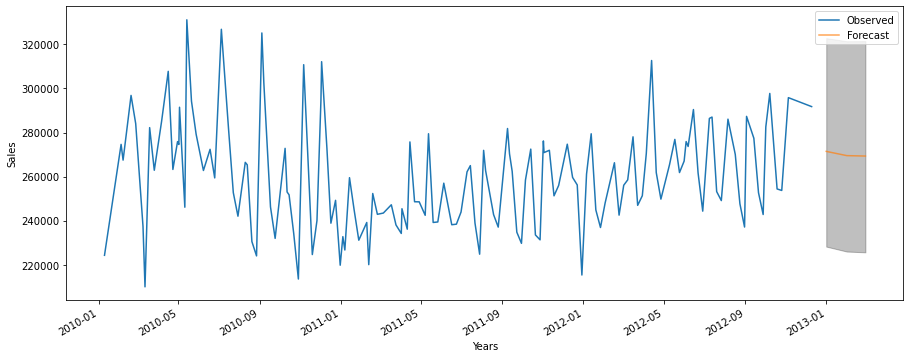

In [126]:
#plotting the forecast for Store-33

axis = Store_33['Weekly_Sales'].plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
#axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.75)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

In [ ]:
#In the same way this model can be used to forecast for all the stores